In [2]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def read_results(fp):
    
    out = []
    header = ['givens', 'singles', 'hidden_singles', 'naked_pairs', 'hidden_paris', 'triples', 'intersections', 
              'guesses','backtracks', 'difficulty', 'time', 'max_space']
    with open(fp, mode='r') as csv_file:
        reader = csv.DictReader(csv_file, fieldnames=header)
        for row in reader:
            out.append(row)
    return out

In [4]:
out_dir = '/home/jgeng/Documents/Git/ECE637-Project1/output'
files = []
for f in os.scandir(out_dir):
    file = f.name 
    difficulty = file[:file.find('_')]
    approach = file[file.find('_') + 1 :file.find('.')]
    files.append((approach, difficulty))

In [5]:
priority = {'simple': 0, 'easy': 1, 'medium': 2, 'hard':3}
files.sort(key=(lambda x: (x[0], priority[x[1]])))

In [9]:
# get overall mean time
out_dir = '/home/jgeng/Documents/Git/ECE637-Project1/output'
meta_time = {'bfs': 0, 'dfs': 0, 'deepening': 0}
for file in files:
    a, d = file
    csv_file = os.path.join(out_dir, "{}_{}.csv".format(d, a))
    results = read_results(csv_file)
    for result in results:
        time = round(float(result['time']), 2)
        meta_time[a] += time
for k, v in meta_time.items():
    print(k, v/400)


bfs 45303.83689999999
dfs 284.4527999999998
deepening 287.1049749999996


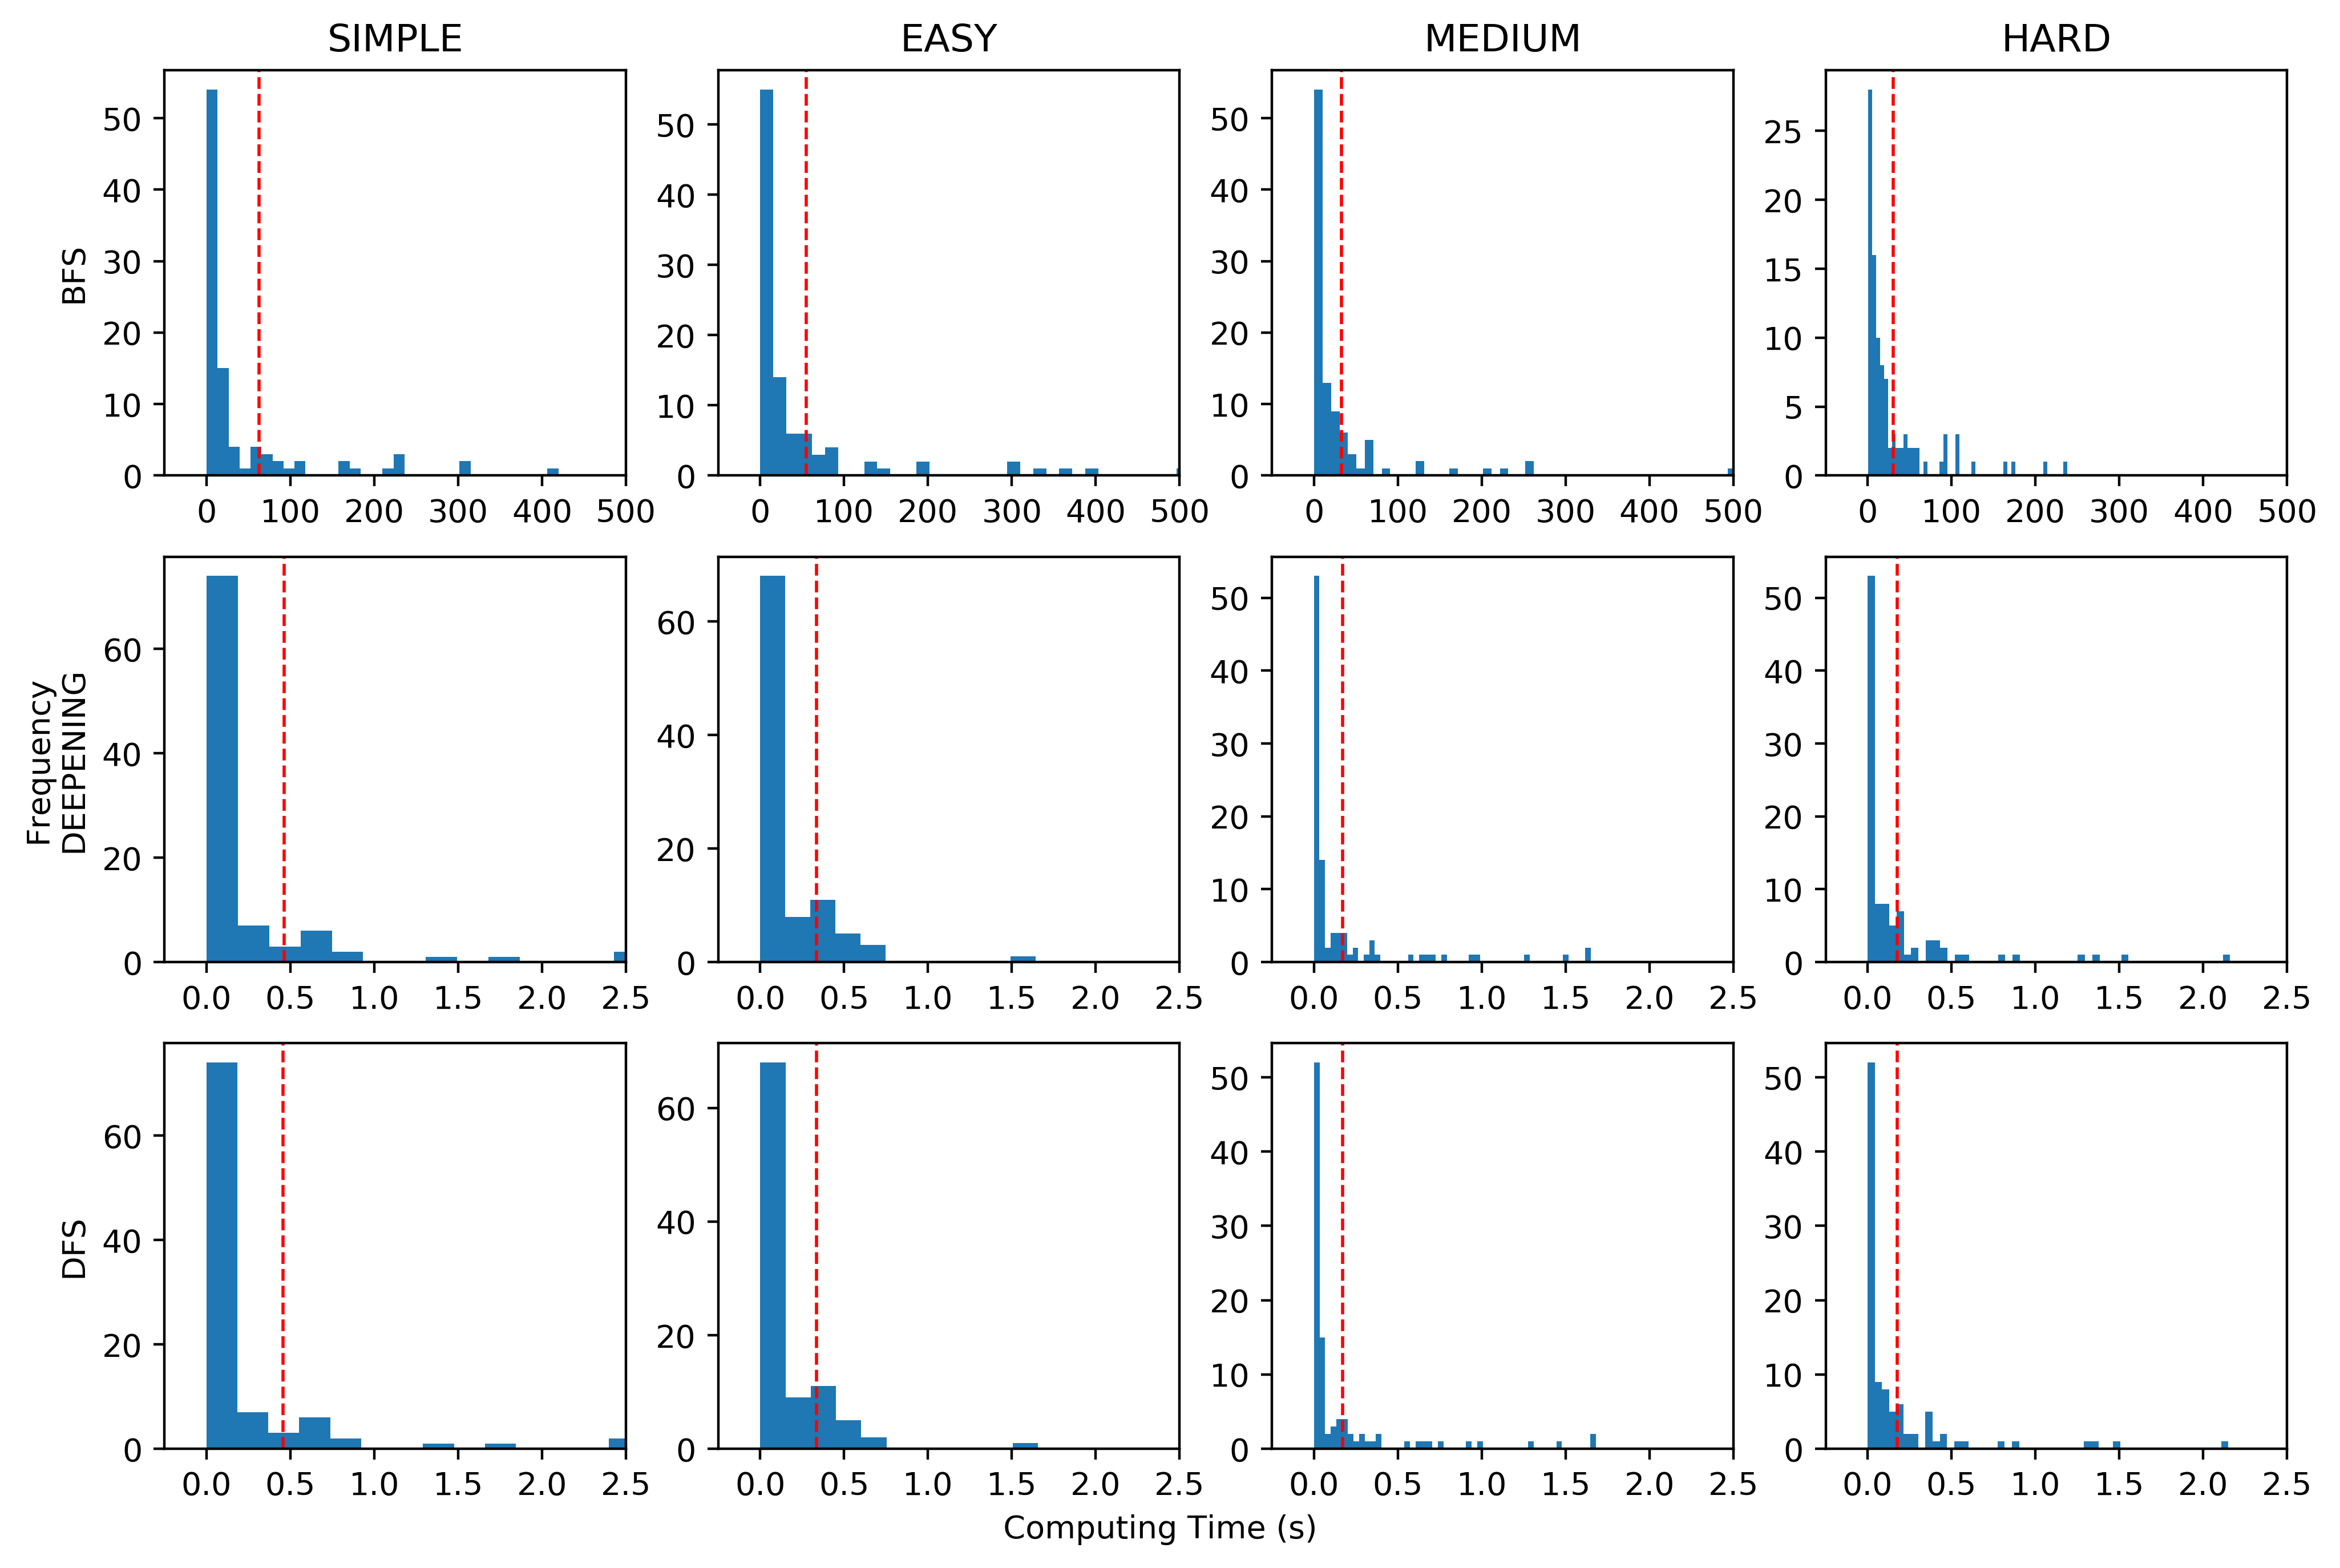

In [95]:
fig = plt.figure(figsize=(12, 8), dpi=400)
out_dir = '/home/jgeng/Documents/Git/ECE637-Project1/output'
avg = {'bfs': 0, 'dfs': 0, 'deepening': 0}
for i in range(1, 13):
    approach, difficulty = files[i-1]
    file = os.path.join(out_dir, "{}_{}.csv".format(difficulty, approach))
    results = read_results(file)
    computing_times = []
    for result in results:
        computing_times.append(float(result['time']))
    computing_times = np.round(np.array(computing_times)/1000, 2)
    mean_time = computing_times.mean()
    avg[approach] += sum(computing_times) / 100
    ax = plt.subplot(3, 4, i)
    approach: str
    if i % 4 == 1:
        if i == 5:
            plt.ylabel("Frequency\n" + approach.upper())
        else: plt.ylabel(approach.upper())
    if i == 10:
        plt.xlabel("                                          Computing Time (s)")
    if i <= 4:
        plt.title(difficulty.upper())
        plt.xlim((-50, 500))
        plt.xticks([100*x for x in range(6)])
    else:
        plt.xlim((-0.25, 2.5))
        plt.xticks([0.5*x for x in range(6)])
    plt.hist(computing_times, bins=50)
    plt.axvline(x=mean_time, ymin=0, ymax=1, color='r', linewidth=1, linestyle='--')


fig.savefig('/home/jgeng/Documents/Git/ECE637-Project1/plot/out.png')
plt.show()

In [87]:
for approach, time in avg.items():
    avg[approach] = round(time/4, 2)
print(avg)


{'bfs': 45303.84, 'dfs': 284.45, 'deepening': 287.1}


In [78]:
from collections import OrderedDict

meta = {'givens': [], 'singles': [], 'hidden_singles': [], 'naked_pairs': [], 'hidden_paris': [], 
          'triples': [], 'intersections': [], 'guesses': [],'backtracks': [], 'difficulty': []}
meta_time = []
results = []
difficulty_map = {'Simple': 1, 'Easy': 2, 'Intermediate':3, 'Expert':4}
for f in os.scandir(out_dir):
    file = f.name 
    difficulty = file[:file.find('_')]
    approach = file[file.find('_') + 1 :file.find('.')]
    if approach == 'dfs':
        file_path = os.path.join(out_dir, file)
        results = read_results(file_path)
        for result in results:
            for key, val in result.items():
                if key in meta:
                    if key != 'difficulty':
                        val = int(val)
                    else:
                        val = difficulty_map[val]
                    meta[key].append(val)
            meta_time.append(round(float(result['time']), 2))

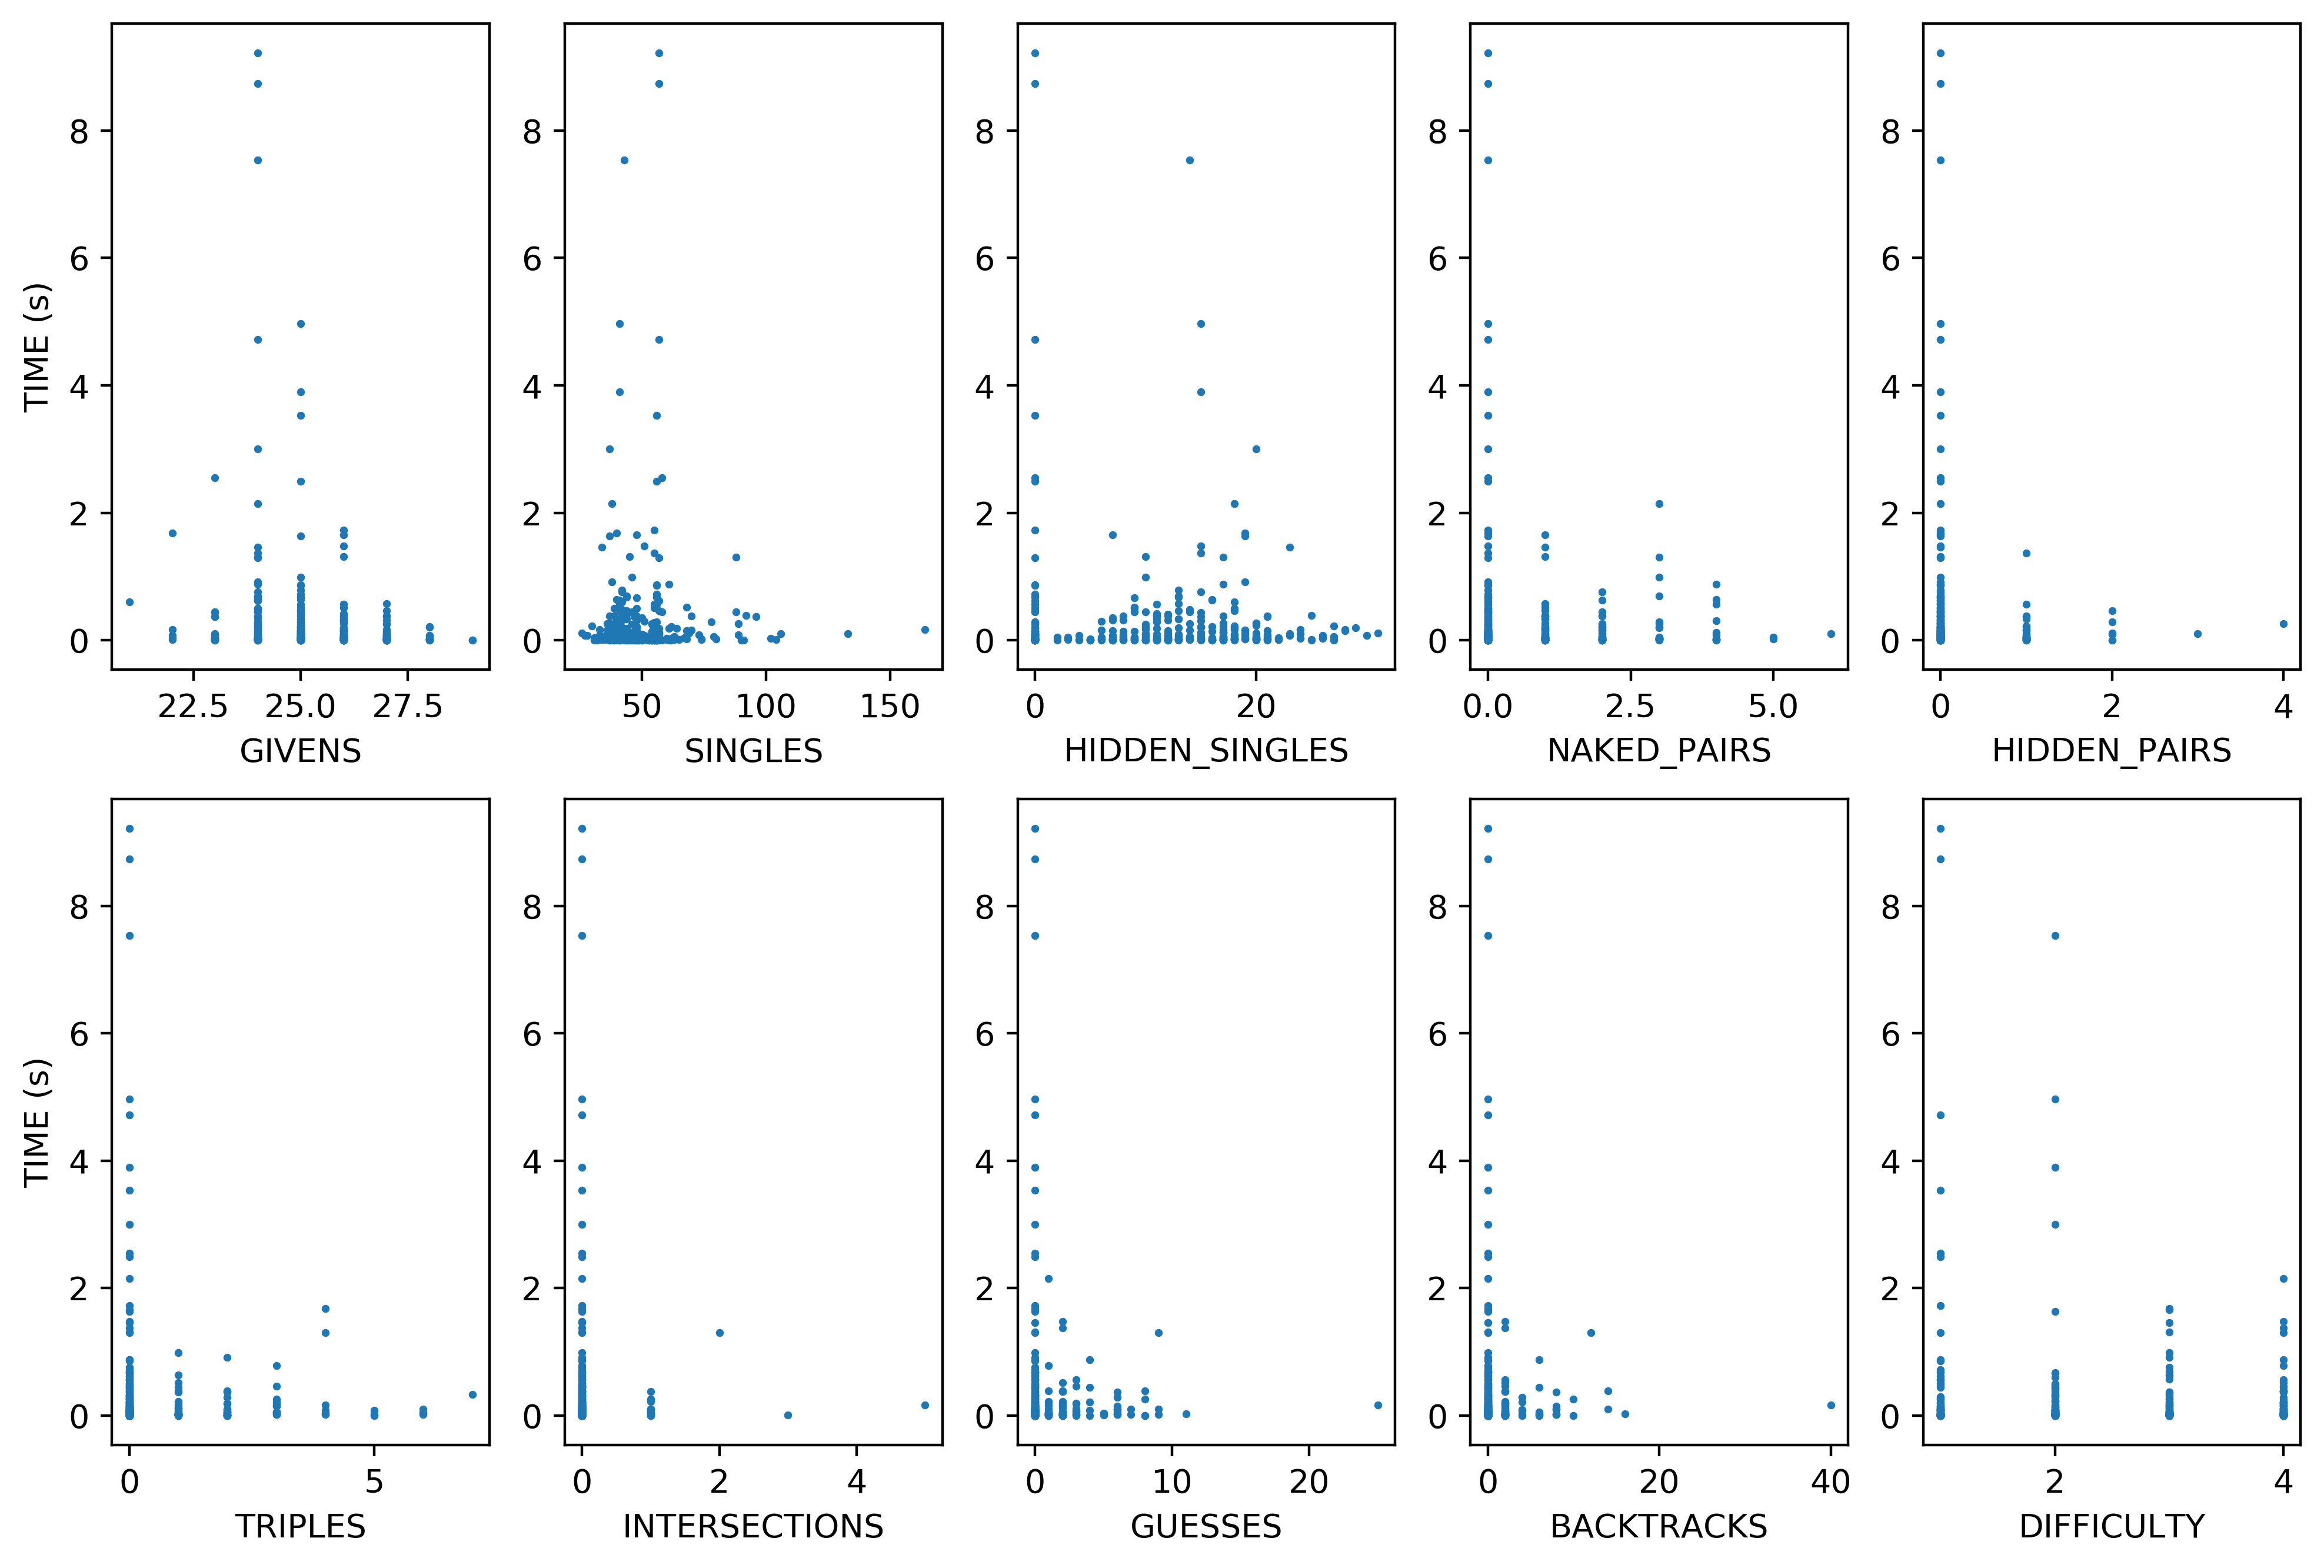

In [88]:
plt.close(fig)
fig = plt.figure(figsize=(12, 8), dpi=400)
i = 1
for criteria, vals in meta.items():
    plt.subplot(2, 5, i)
    if i % 5 == 1:
        plt.ylabel("TIME (s)")
    i += 1
    plt.scatter(x=np.array(vals, dtype=np.int), y=np.array(meta_time)/1000, s=2)
    if criteria == 'hidden_paris':
        criteria = 'hidden_pairs'
    plt.xlabel(criteria.upper())
fig.savefig('/home/jgeng/Documents/Git/ECE637-Project1/plot/out2.png')